In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from io import StringIO

# Soft margin SVM

### Make fake data to see the effect of C on decision boundary and margin width.

In [2]:
data_string = """
x1,   x2,   y
 0,    1,   1
 0,    2,   1
 2,    1,   1
 2,    2,   1
 1,    1,   1
 1,    2,   1
-1,   -1,  -1
-1,   -2,  -1
 0,   -1,  -1
 0,   -2,  -1
 1,   -1,  -1
 1,   -2,  -1
 1.5, -1.1, 1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
X = df[['x1', 'x2']]
y = df.y
print(f'X=\n{X},\ny=\n{y}')

X=
     x1   x2
0   0.0  1.0
1   0.0  2.0
2   2.0  1.0
3   2.0  2.0
4   1.0  1.0
5   1.0  2.0
6  -1.0 -1.0
7  -1.0 -2.0
8   0.0 -1.0
9   0.0 -2.0
10  1.0 -1.0
11  1.0 -2.0
12  1.5 -1.1,
y=
0     1
1     1
2     1
3     1
4     1
5     1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12    1
Name: y, dtype: int64


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\leoxi\AppData\Local\Temp\ipykernel_9244\3519107629.py:17: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')


### Train SVM classifier with C=1000 and C=1
* C=1000 approaches a hard-margin SVM, which yields a smaller margin
  and classifies training examples better.
* C=1 gives a soft-margin SVM, yielding a larger road that makes training
errors on noisy data but may generalize better to new unseen data.


The decision boundary is 4.66 * weight + 3.33 * mileage + -2.33 = 0.
The training accuracy is 1.0.
clf.score=1.0


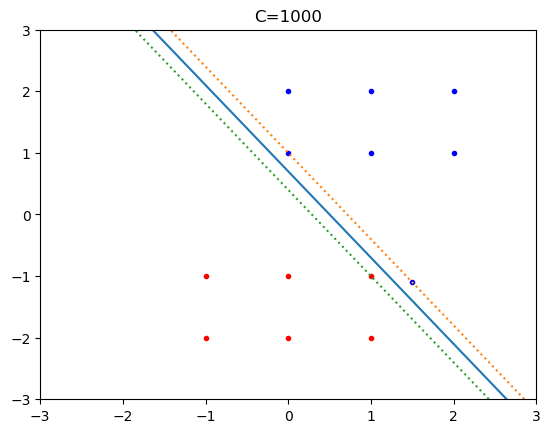

The decision boundary is 0.5 * weight + 1.0 * mileage + -0.0 = 0.
The training accuracy is 0.923.
clf.score=0.9230769230769231


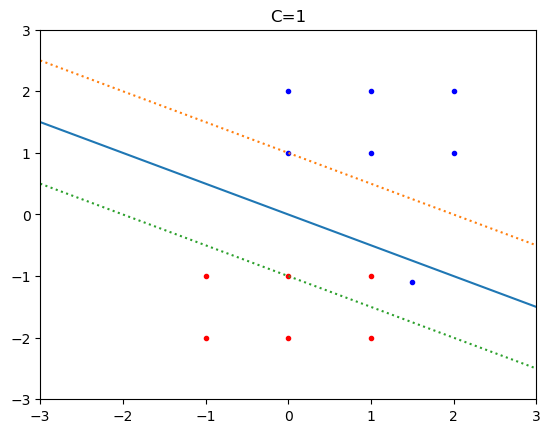

In [5]:
C_values = [1000, 1]
for C in C_values:
  clf = svm.SVC(kernel="linear", C=C)
  clf.fit(X, y)
  w = clf.coef_[0]
  b = clf.intercept_[0]
  print(f'The decision boundary is {w[0]:.3} * weight + {w[1]:.3} * mileage + {b:.3} = 0.')
  print(f'The training accuracy is {clf.score(X, y):.3}.')
  print(f'clf.score={clf.score(X, y)}')
  
  plt.plot(X.x1[y == -1], X.x2[y == -1], '.r', label='-1')
  plt.plot(X.x1[y ==  1], X.x2[y ==  1], '.b', label='+1')
  plt.title(f'C={C}')
  low = -3
  high=3
  plt.xlim(low, high)
  plt.ylim(low, high)
  xplot = np.linspace(start=low, stop=high)
  yplot = -(clf.coef_[0][0] * xplot + clf.intercept_) / clf.coef_[0][1]
  plt.plot(xplot, yplot, label=r'decision boundary $\mathbf{wx} + b = 0$')
  plt.plot(xplot, yplot + 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b =  1$')
  plt.plot(xplot, yplot - 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b = -1$')
  # plt.legend()
  plt.show(block=False)

### More practice with soft margin SVM:
guess transmission type from car weight and mileage

The decision boundary is -4.77 * weight + -0.24 * mileage + 19.5 = 0.
The training accuracy is 0.938.


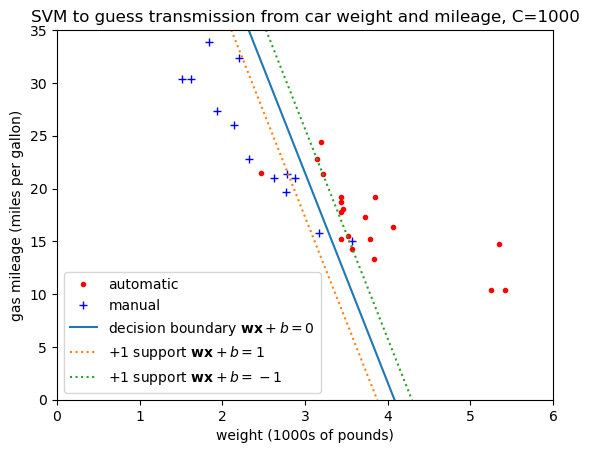

The decision boundary is -1.94 * weight + -0.0296 * mileage + 6.23 = 0.
The training accuracy is 0.906.


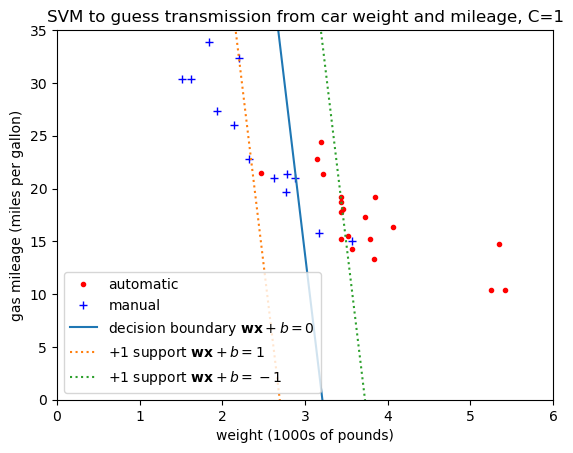

In [7]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/mtcars.csv', index_col=0)
X = df[['wt', 'mpg']]
y = df.am
for C in C_values:
  clf = svm.SVC(kernel="linear", C=C)
  clf.fit(X, y)
  w = clf.coef_[0]
  b = clf.intercept_[0]
  print(f'The decision boundary is {w[0]:.3} * weight + {w[1]:.3} * mileage + {b:.3} = 0.')
  print(f'The training accuracy is {clf.score(X, y):.3}.')

  plt.plot(X.wt[y == 0], X.mpg[y == 0], '.r', label='automatic')
  plt.plot(X.wt[y == 1], X.mpg[y == 1], '+b', label='manual') # '+' = '+ marker'
  plt.xlim(0, 6)
  plt.ylim(0, 35)
  plt.xlabel('weight (1000s of pounds)')
  plt.ylabel('gas mileage (miles per gallon)')
  plt.title(f'SVM to guess transmission from car weight and mileage, C={C}')
  xplot = np.linspace(start=0, stop=6)
  yplot = -(clf.coef_[0][0] * xplot + clf.intercept_) / clf.coef_[0][1]
  plt.plot(xplot, yplot, label=r'decision boundary $\mathbf{wx} + b = 0$')
  plt.plot(xplot, yplot + 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b =  1$')
  plt.plot(xplot, yplot - 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b = -1$')
  plt.legend()
  plt.show(block=False)


# Nonlinear boundary: use kernel trick

### Make fake data consisting of (noisy) concentric circles.
These are not linearly separable in 2D.

In [9]:
n = 10 # we will plot 4*n points, 2*n red and 2*n blue
radius = (2, 5)
X = np.zeros(shape=(4 * n, 2))
sigma = 0.5
for i in (0, 1):
    rng = np.random.default_rng(seed=0)
    x = np.linspace(start=-radius[i], stop=radius[i], num=n)
    x_low  = x + rng.normal(loc=0, scale=sigma, size=n)
    x_high = x + rng.normal(loc=0, scale=sigma, size=n)
    y_low   = -np.sqrt(radius[i]**2 - x**2) + rng.normal(loc=0, scale=sigma, size=n)
    y_high  =  np.sqrt(radius[i]**2 - x**2) + rng.normal(loc=0, scale=sigma, size=n)
    X[(i * 2*n):((i + 1) * 2*n), 0] = np.concatenate((x_low, x_high))
    X[(i * 2*n):((i + 1) * 2*n), 1] = np.concatenate((y_low, y_high))

y = np.concatenate((np.full(shape=2*n, fill_value=0), np.full(shape=2*n, fill_value=1)))

# save data to file for future use
df = pd.DataFrame({'x0': X[:, 0], 'x1': X[:, 1], 'y': y})
df.to_csv(path_or_buf='circles.csv', index=False, float_format='%.3f')

### Plot data.

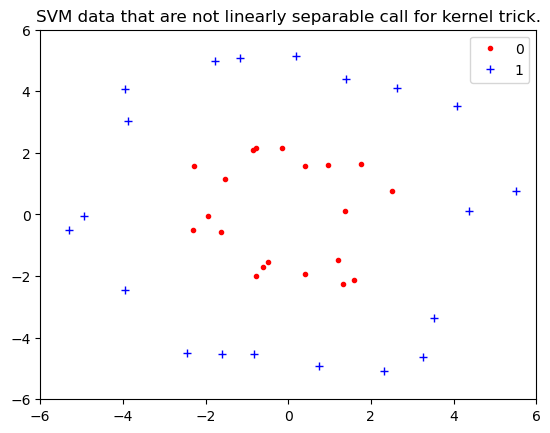

In [11]:
plt.plot(X[y == 0, 0], X[y == 0, 1], '.r', label='0')
plt.plot(X[y == 1, 0], X[y == 1, 1], '+b', label='1')
r = 6
plt.xlim(-r, r)
plt.ylim(-r, r)
plt.title('SVM data that are not linearly separable call for kernel trick.')
_ = plt.legend()


### Make 3D plot of transformed data to understand how kernel trick can help.
The transformed data are easy to separate linearly with a plane.
The kernel trick avoids this explicit transformation but has the same effect.

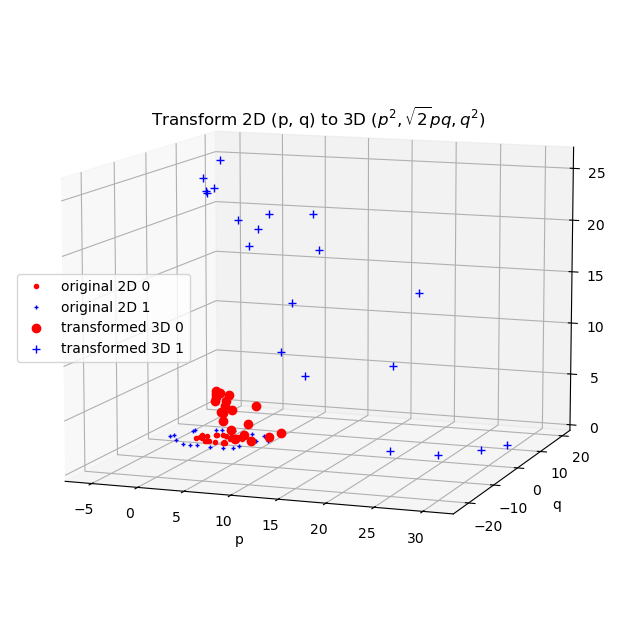

In [13]:
fig = plt.figure(figsize=(8, 8)) # (width, height) in inches
ax  = fig.add_subplot(111, projection='3d') # 111 => nrows=1, ncols=1, index=1
# plot 2D data in z=0 plane
ax.plot3D(X[y==0,0], X[y==0,1], 0, 'or', markersize=3, label='original 2D 0') # 'or' = circle, red
ax.plot3D(X[y==1,0], X[y==1,1], 0, '+b', markersize=3, label='original 2D 1') # '+r' = plus, blue

def phi(x, y): # this function maps the 2D point (x, y) to the 3D point given in its return line
    return (x**2, np.sqrt(2)*x*y, y**2)

# plot 3D transformed data:
# transform vectors of x- and y-plotting coordinates into 3D, for the (classification) y==0 case:
xplot, yplot, zplot = phi(X[y==0,0], X[y==0,1])
ax.plot3D(xplot, yplot, zplot, 'or', label='transformed 3D 0')
# transform for the y==1 case:
xplot, yplot, zplot = phi(X[y==1,0], X[y==1,1])
ax.plot3D(xplot, yplot, zplot, '+b', label='transformed 3D 1')

ax.view_init(elev=10, azim=-70)
plt.legend(loc='center left')
#plt.title(f'Transform 2D (p, q) to 3D $(p^2, \\sqrt{{2}}pq, q^2)$') # default title is too high
ax.set_title(f'Transform 2D (p, q) to 3D $(p^2, \\sqrt{{2}}pq, q^2)$', y=0.87) # y=1.0 is top of plot
plt.xlabel('p')
plt.ylabel('q')

plt.savefig(fname='circlesSVM_3D.png')

### Notice that a linear SVM gives low accuracy.

In [15]:
clf_linear = svm.SVC(kernel='linear', C=1)
clf_linear.fit(X, y)
print(f'clf_linear.score(X, y)={clf_linear.score(X, y)}')

clf_linear.score(X, y)=0.5


### The kernel trick's implicit transformation into higher dimensions works well.

In [19]:
clf_RBF = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf_RBF.fit(X, y)
print(f'clf_RBF.score(X, y)={clf_RBF.score(X, y)}')

clf_RBF.score(X, y)=1.0


In [23]:

def letterhead(): # define 'letterhead()' with no parameters
    print('1300 University Avenue')
    print('Madison WI 53706')
def standardize(x, mu=0, sigma=1): # define 'standardize()' with 3 parameters
    print(f'standardize(x={x}, mu={mu}, sigma={sigma})') # debugging output
    z = (x - mu) / sigma
    return z
letterhead() # call letterhead()
standardize(x=10, mu=6, sigma=2) # call standardize()

1300 University Avenue
Madison WI 53706
standardize(x=10, mu=6, sigma=2)


2.0